In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\prasa\OneDrive\Documents\KC\CODES 2024\project24\supply_chain_data.csv")

In [5]:
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [7]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [8]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

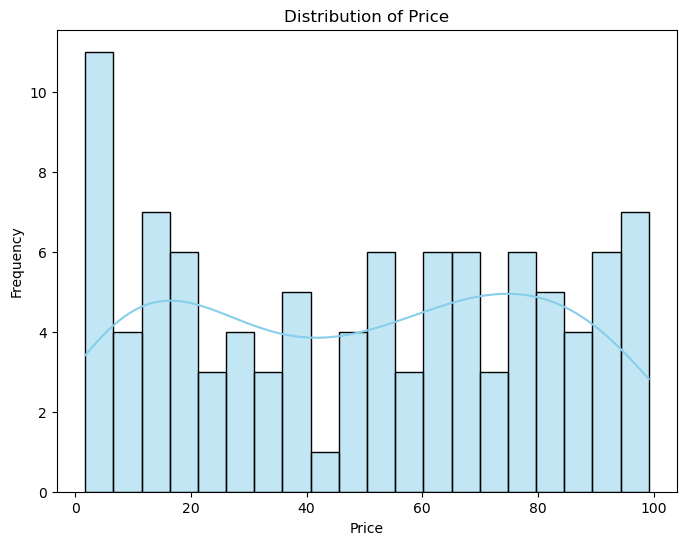

In [9]:
# Distribution of 'Price'
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

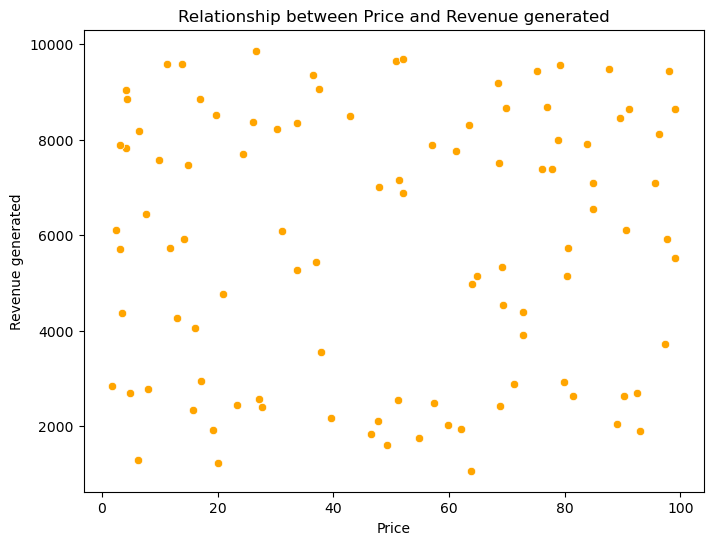

In [10]:
# Relationship between 'Price' and 'Revenue generated'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Revenue generated', data=df, color='orange')
plt.title('Relationship between Price and Revenue generated')
plt.xlabel('Price')
plt.ylabel('Revenue generated')
plt.show()

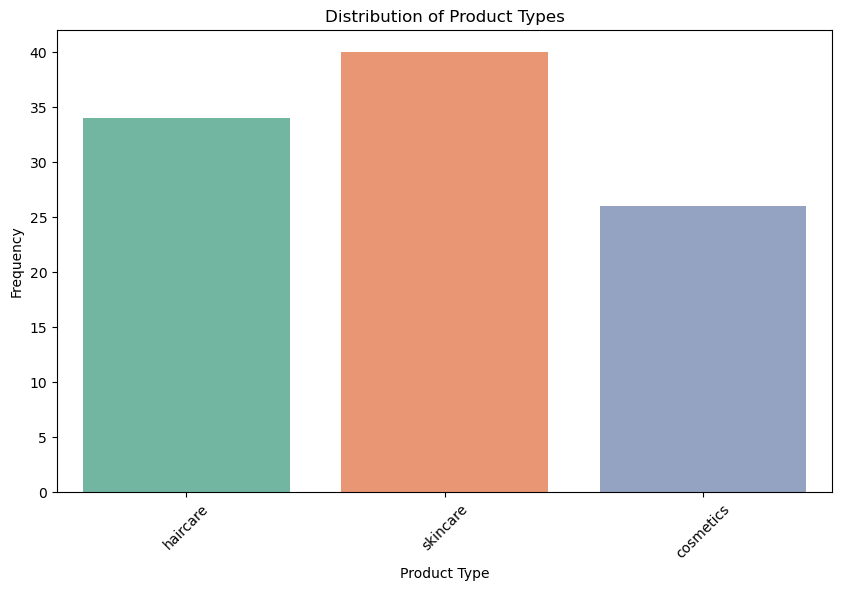

In [11]:
# Visualizing the distribution of 'Product type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Product type', data=df, palette='Set2')
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

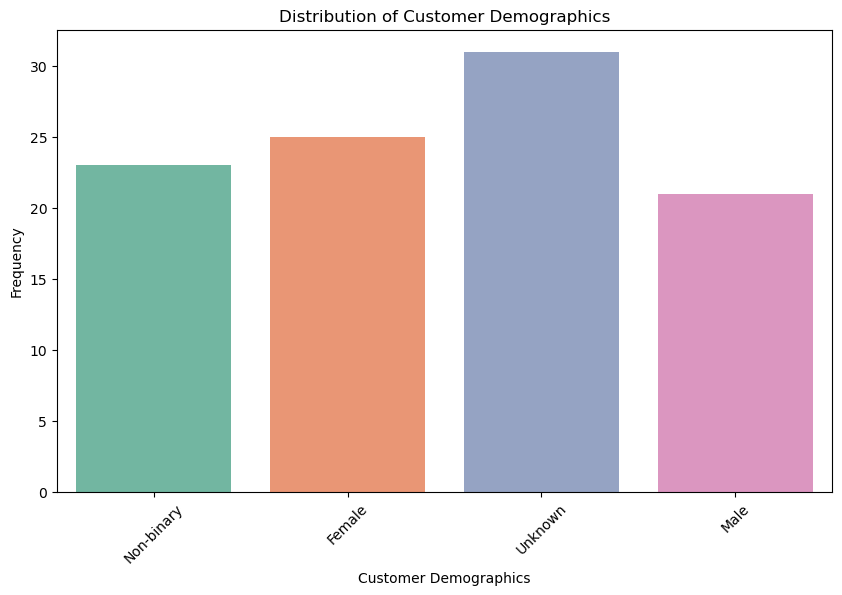

In [12]:
# Visualizing the distribution of 'Customer demographics'
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer demographics', data=df, palette='Set2')
plt.title('Distribution of Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

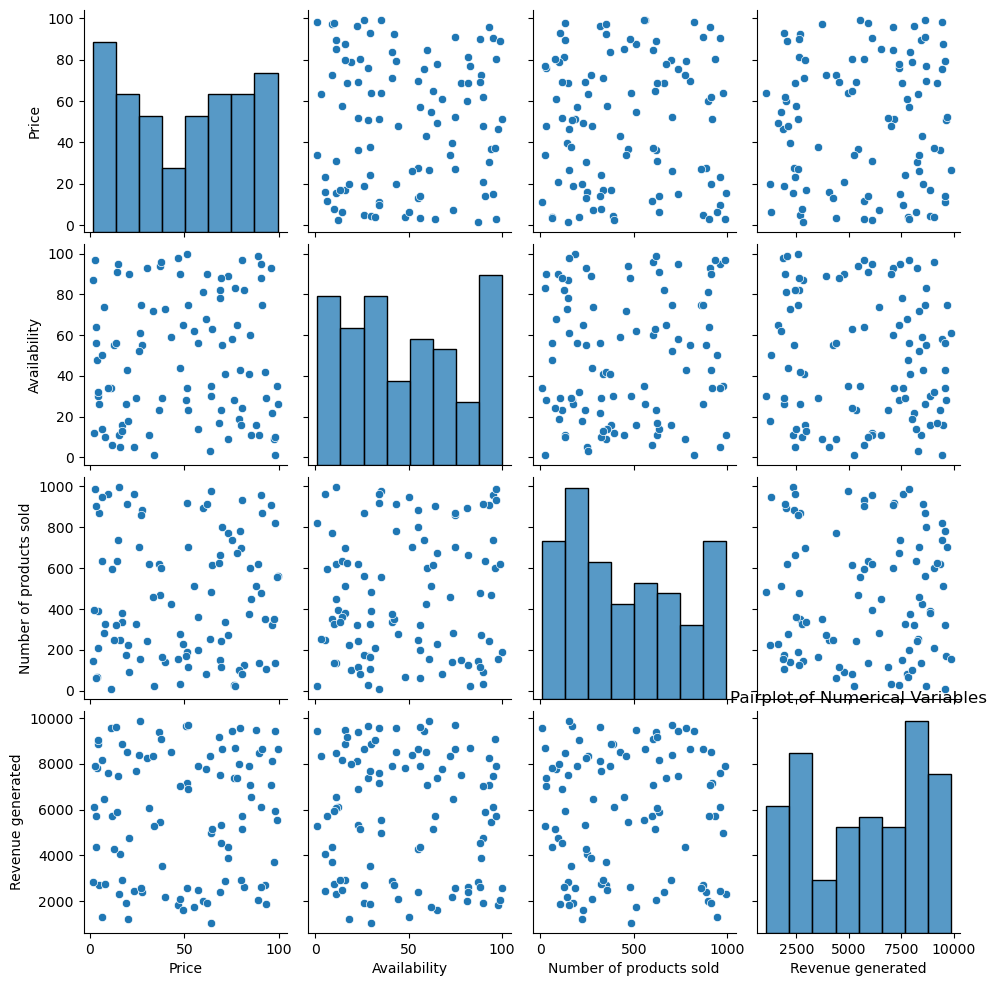

In [13]:
# Exploring relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Price', 'Availability', 'Number of products sold', 'Revenue generated']])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [14]:
# Calculating correlation matrix
correlation_matrix = df.corr()

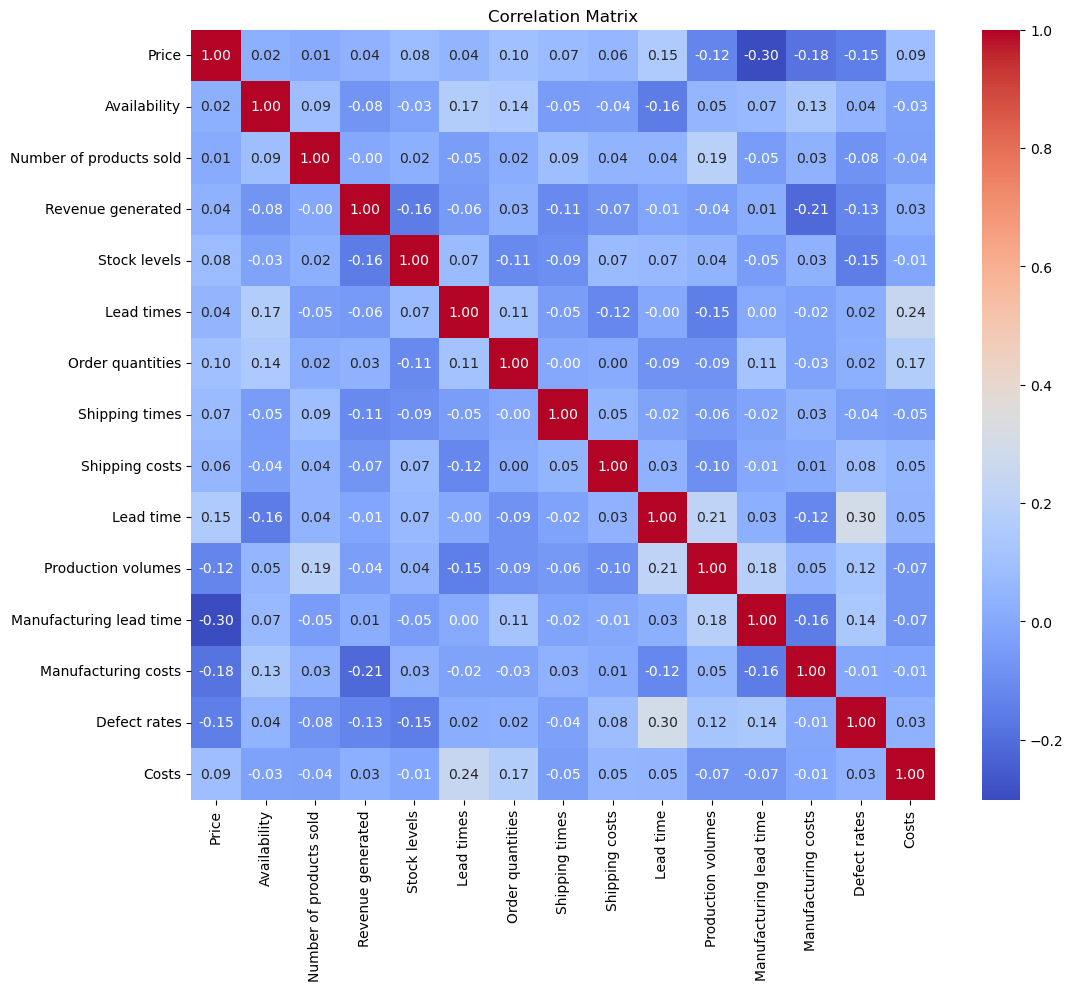

In [15]:
# Visualizing correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Calculate inventory turnover ratio for each product type
inventory_turnover = df.groupby('Product type').apply(lambda x: x['Number of products sold'].sum() / x['Stock levels'].mean()).reset_index(name='Inventory Turnover Ratio')

# Sort the results by inventory turnover ratio
inventory_turnover = inventory_turnover.sort_values(by='Inventory Turnover Ratio', ascending=False)

# Display the inventory turnover ratio for each product type
print("Inventory Turnover Ratio for Each Product Type:")
print(inventory_turnover)

Inventory Turnover Ratio for Each Product Type:
  Product type  Inventory Turnover Ratio
2     skincare                515.696517
1     haircare                281.492701
0    cosmetics                200.447213


In [17]:
# Calculate on-time delivery rate for each supplier
on_time_delivery_rate = df.groupby('Supplier name')['Shipping times'].apply(lambda x: (x <= x.mean()).mean()).reset_index(name='On-Time Delivery Rate')

# Calculate defect rate for each supplier
defect_rate = df.groupby('Supplier name')['Defect rates'].mean().reset_index(name='Defect Rate')

# Calculate lead time variability for each supplier
lead_time_variability = df.groupby('Supplier name')['Lead times'].std().reset_index(name='Lead Time Variability')

# Merge the calculated metrics into a single DataFrame
supplier_performance = pd.merge(on_time_delivery_rate, defect_rate, on='Supplier name')
supplier_performance = pd.merge(supplier_performance, lead_time_variability, on='Supplier name')

# Display the supplier performance metrics
print("Supplier Performance Metrics:")
print(supplier_performance)

Supplier Performance Metrics:
  Supplier name  On-Time Delivery Rate  Defect Rate  Lead Time Variability
0    Supplier 1               0.481481     1.803630               8.590394
1    Supplier 2               0.409091     2.362750               8.809799
2    Supplier 3               0.600000     2.465786               8.764104
3    Supplier 4               0.500000     2.337397               8.898116
4    Supplier 5               0.500000     2.665408               9.596602


In [18]:
# Calculate average transportation costs and lead times for each transportation mode
transportation_costs = df.groupby('Transportation modes')['Shipping costs'].mean().reset_index(name='Average Transportation Costs')
transportation_lead_times = df.groupby('Transportation modes')['Shipping times'].mean().reset_index(name='Average Shipping Lead Time')

# Display the average transportation costs and lead times
print("Average Transportation Costs by Mode:")
print(transportation_costs)
print("\nAverage Shipping Lead Time by Mode:")
print(transportation_lead_times)

Average Transportation Costs by Mode:
  Transportation modes  Average Transportation Costs
0                  Air                      6.017839
1                 Rail                      5.469098
2                 Road                      5.542115
3                  Sea                      4.970294

Average Shipping Lead Time by Mode:
  Transportation modes  Average Shipping Lead Time
0                  Air                    5.115385
1                 Rail                    6.571429
2                 Road                    4.724138
3                  Sea                    7.117647


In [19]:
# Calculate the overall defect rate
overall_defect_rate = df['Defect rates'].mean()

# Display the overall defect rate
print("Overall Defect Rate:", overall_defect_rate)

Overall Defect Rate: 2.277157992739611


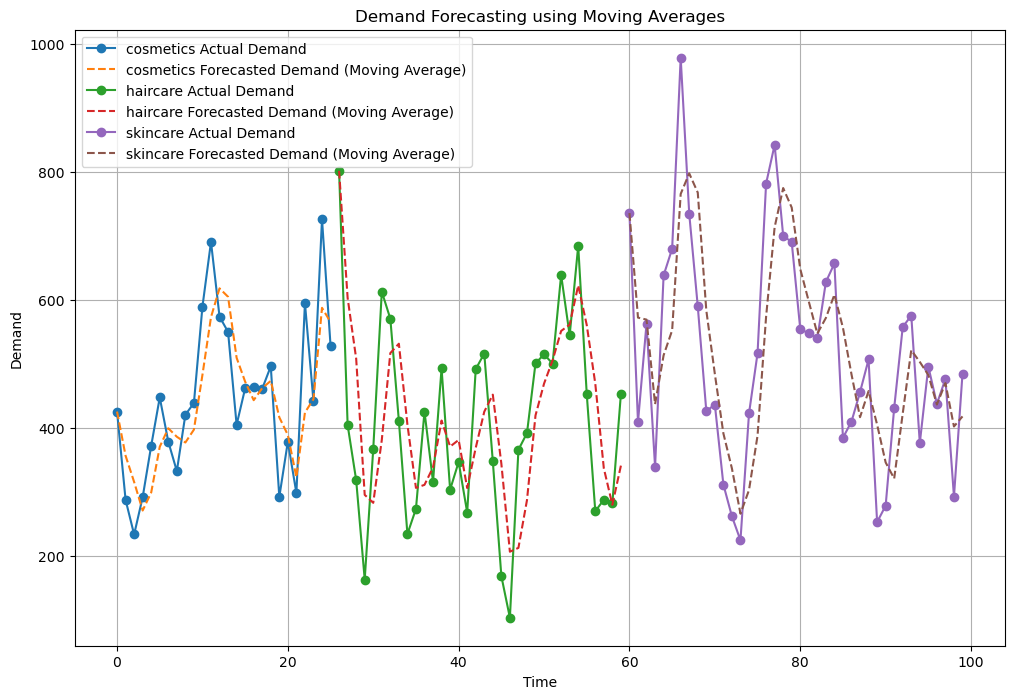

In [20]:
# Group the data by product type
grouped_df = df.groupby('Product type')

# Define the window size for the moving average
window_size = 3  # You can adjust this value based on your data and requirements

# Calculate the moving average demand for each product type
moving_average_demand = grouped_df['Number of products sold'].rolling(window=window_size, min_periods=1).mean().reset_index()

# Plot the actual and forecasted demand for each product type
plt.figure(figsize=(12, 8))
for product_type, data in moving_average_demand.groupby('Product type'):
    plt.plot(data.index, data['Number of products sold'], label=f'{product_type} Actual Demand', marker='o')
    plt.plot(data.index, data['Number of products sold'].rolling(window=window_size, min_periods=1).mean(), linestyle='--', label=f'{product_type} Forecasted Demand (Moving Average)')
plt.title('Demand Forecasting using Moving Averages')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Calculate EOQ for each product SKU
def calculate_eoq(row):
    # Constants
    holding_cost_per_unit = 0.1  # Placeholder value for holding cost per unit
    ordering_cost_per_order = 50  # Placeholder value for ordering cost per order
    
    # Extract relevant data
    demand = row['Number of products sold']
    holding_cost = holding_cost_per_unit * row['Price']
    
    # Calculate EOQ
    eoq = np.sqrt((2 * demand * ordering_cost_per_order) / holding_cost)
    
    return eoq

# Apply the function to calculate EOQ for each row
df['EOQ'] = df.apply(calculate_eoq, axis=1)

# Display the EOQ for each product SKU
print("Economic Order Quantity (EOQ) for Each Product SKU:")
print(df[['SKU', 'EOQ']])

Economic Order Quantity (EOQ) for Each Product SKU:
      SKU         EOQ
0    SKU0  107.185137
1    SKU1  222.674460
2    SKU2   26.584461
3    SKU3   36.837779
4    SKU4  425.735598
..    ...         ...
95  SKU95   92.876312
96  SKU96  115.178610
97  SKU97  132.601317
98  SKU98  214.981563
99  SKU99   95.660349

[100 rows x 2 columns]


In [22]:
# Calculate supplier performance metrics
supplier_performance = df.groupby('Supplier name').agg({
    'Lead times': 'mean',  # Average lead time
    'Defect rates': 'mean',  # Average defect rate
    'Price': 'mean'  # Average price
}).reset_index()

# Rename columns for clarity
supplier_performance.columns = ['Supplier name', 'Average Lead Time', 'Average Defect Rate', 'Average Price']

# Display supplier performance metrics
print("Supplier Performance Metrics:")
print(supplier_performance)

Supplier Performance Metrics:
  Supplier name  Average Lead Time  Average Defect Rate  Average Price
0    Supplier 1          16.777778             1.803630      59.226639
1    Supplier 2          16.227273             2.362750      46.542244
2    Supplier 3          14.333333             2.465786      45.456788
3    Supplier 4          17.000000             2.337397      46.329703
4    Supplier 5          14.722222             2.665408      44.856168


In [23]:
# Calculate supply chain risk metrics
risk_metrics = {
    'Supplier Performance Risk': df['Defect rates'].mean(),  # Average defect rate across all suppliers
    'Lead Time Variability': df['Lead times'].std(),  # Standard deviation of lead times
    'Demand Variability': df['Number of products sold'].std()  # Standard deviation of demand
}

# Display supply chain risk metrics
print("Supply Chain Risk Metrics:")
for metric, value in risk_metrics.items():
    print(f"{metric}: {value}")

Supply Chain Risk Metrics:
Supplier Performance Risk: 2.277157992739611
Lead Time Variability: 8.785801217322359
Demand Variability: 303.780073790766


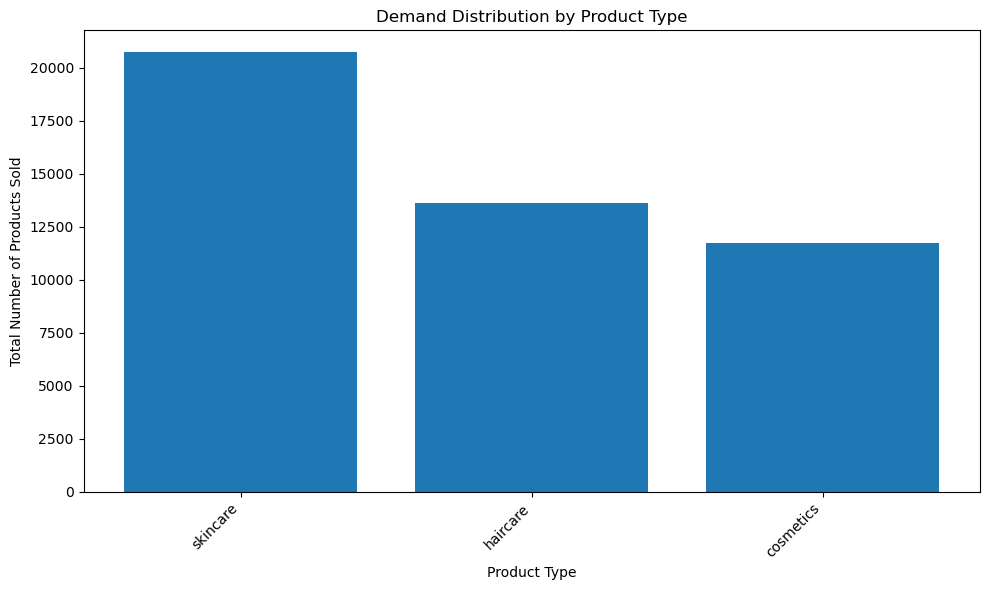

In [27]:
# Group the data by product type and sum the number of products sold
product_sales = df.groupby('Product type')['Number of products sold'].sum().reset_index()

# Sort the product sales data by total sales
product_sales_sorted = product_sales.sort_values(by='Number of products sold', ascending=False)

# Plot the demand distribution by product type
plt.figure(figsize=(10, 6))
plt.bar(product_sales_sorted['Product type'], product_sales_sorted['Number of products sold'])
plt.title('Demand Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

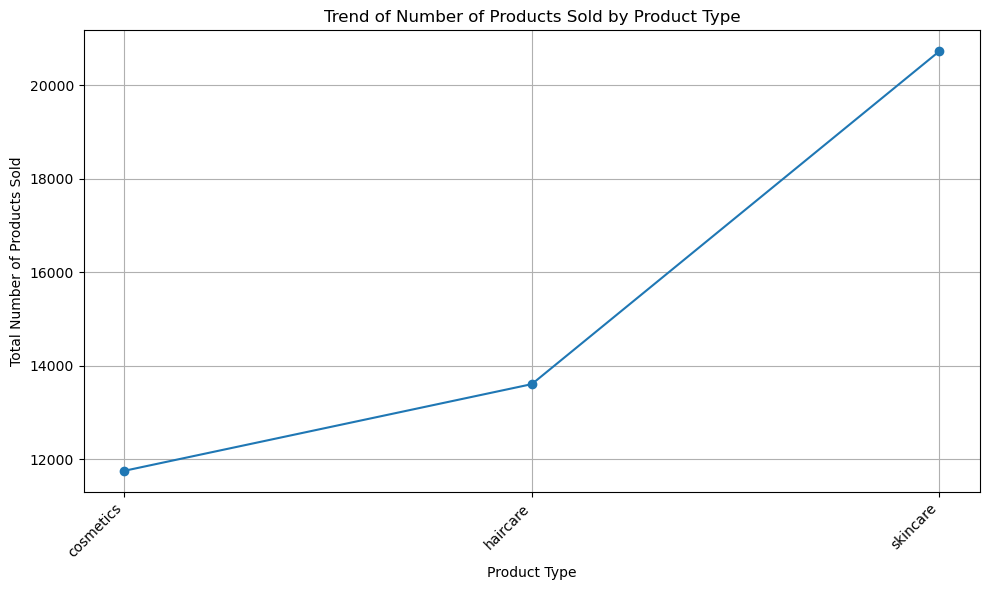

In [28]:
# Group the data by product type and sum the number of products sold
product_sales = df.groupby('Product type')['Number of products sold'].sum().reset_index()

# Sort the product sales data by product type
product_sales_sorted = product_sales.sort_values(by='Product type')

# Plot the trend of number of products sold for each product type
plt.figure(figsize=(10, 6))
plt.plot(product_sales_sorted['Product type'], product_sales_sorted['Number of products sold'], marker='o')
plt.title('Trend of Number of Products Sold by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

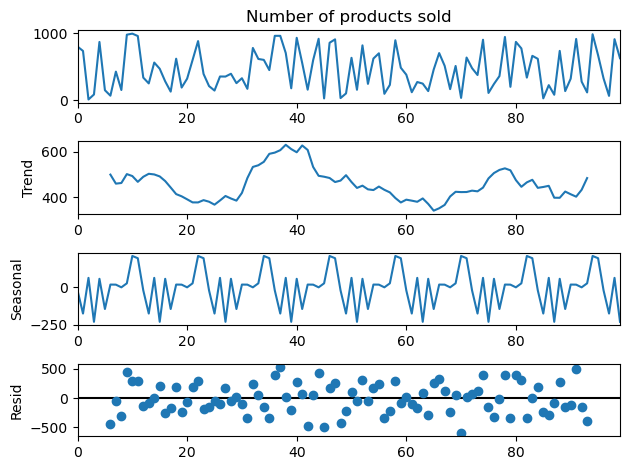

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df contains the dataset with the relevant data
# Example usage for 'Number of products sold' as the target variable
result = seasonal_decompose(df['Number of products sold'], model='additive', period=12)  # Adjust period as needed
result.plot()
plt.show()

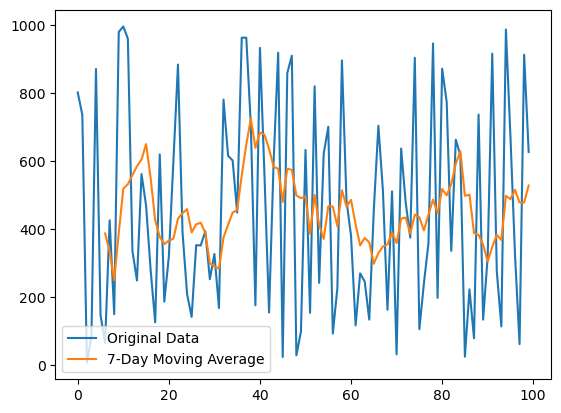

In [30]:
# Assuming df contains the dataset with the relevant data
# Example usage for 'Number of products sold' as the target variable
window_size = 7  # Example window size
rolling_avg = df['Number of products sold'].rolling(window=window_size).mean()
plt.plot(df['Number of products sold'], label='Original Data')
plt.plot(rolling_avg, label=f'{window_size}-Day Moving Average')
plt.legend()
plt.show()

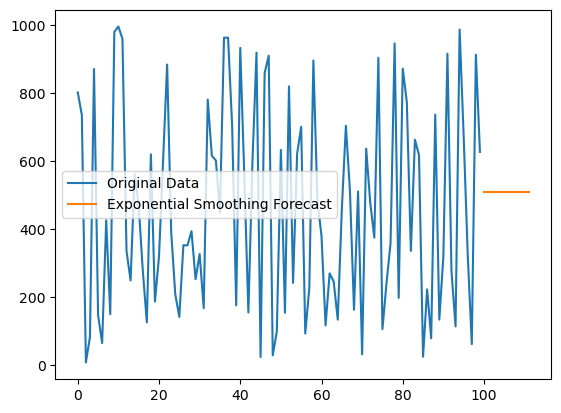

In [32]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Assuming df contains the dataset with the relevant data
# Example usage for 'Number of products sold' as the target variable
model = SimpleExpSmoothing(df['Number of products sold'])
fit = model.fit()
forecast = fit.forecast(steps=12)  # Example: Forecasting for the next 12 steps
plt.plot(df['Number of products sold'], label='Original Data')
plt.plot(forecast, label='Exponential Smoothing Forecast')
plt.legend()
plt.show()

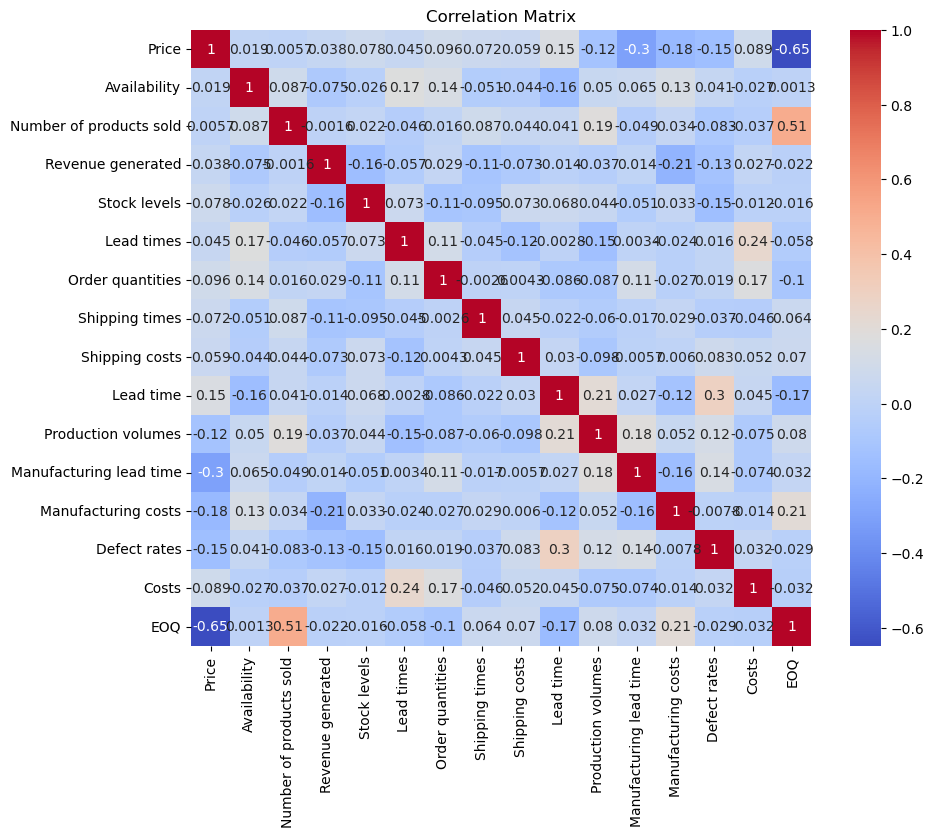

In [33]:
# Example usage for analyzing correlations between 'Number of products sold' and other variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

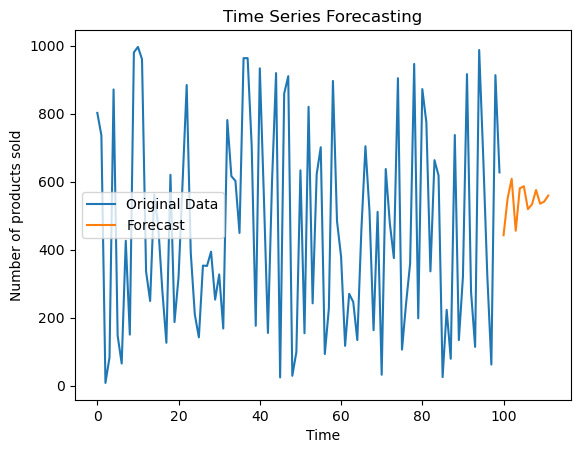

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df contains the dataset with the relevant data
# Example usage for 'Number of products sold' as the target variable
# Convert 'Number of products sold' to a time series
time_series = pd.Series(df['Number of products sold'])

# Fit ARIMA model
model = ARIMA(time_series, order=(5,1,0))  # Example ARIMA order, adjust as needed
model_fit = model.fit()

# Forecast next n steps
forecast_steps = 12  # Example: Forecasting for the next 12 steps
forecast = model_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.plot(time_series, label='Original Data')
plt.plot(range(len(time_series), len(time_series) + forecast_steps), forecast, label='Forecast')
plt.title('Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Number of products sold')
plt.legend()
plt.show()